# <u> Assingment Clustering - Crime Data set 

## Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.
 

## ======================================================================== 

# 1. Data Description - 

### Murder -- Muder rates in different places of United States

### Assualt- Assualt rate in different places of United States

### UrbanPop - urban population in different places of United States

### Rape - Rape rate in different places of United States


# 2. Import Neccessery Libraries -  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 3. Import Warnings -  

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 4. Import Data Set -  

In [3]:
crime_data = pd.read_csv('crime_data.csv')
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
crime_data.rename({'Unnamed: 0' : 'State'}, axis = 1,inplace = True)

In [5]:
crime_data

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# 5. EDA -  

In [6]:
crime_data.shape

(50, 5)

In [7]:
crime_data.isna().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [8]:
crime_data.duplicated().sum()

0

In [9]:
crime_data.dtypes

State        object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

In [10]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [11]:
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


# 6. Data Visualization -  

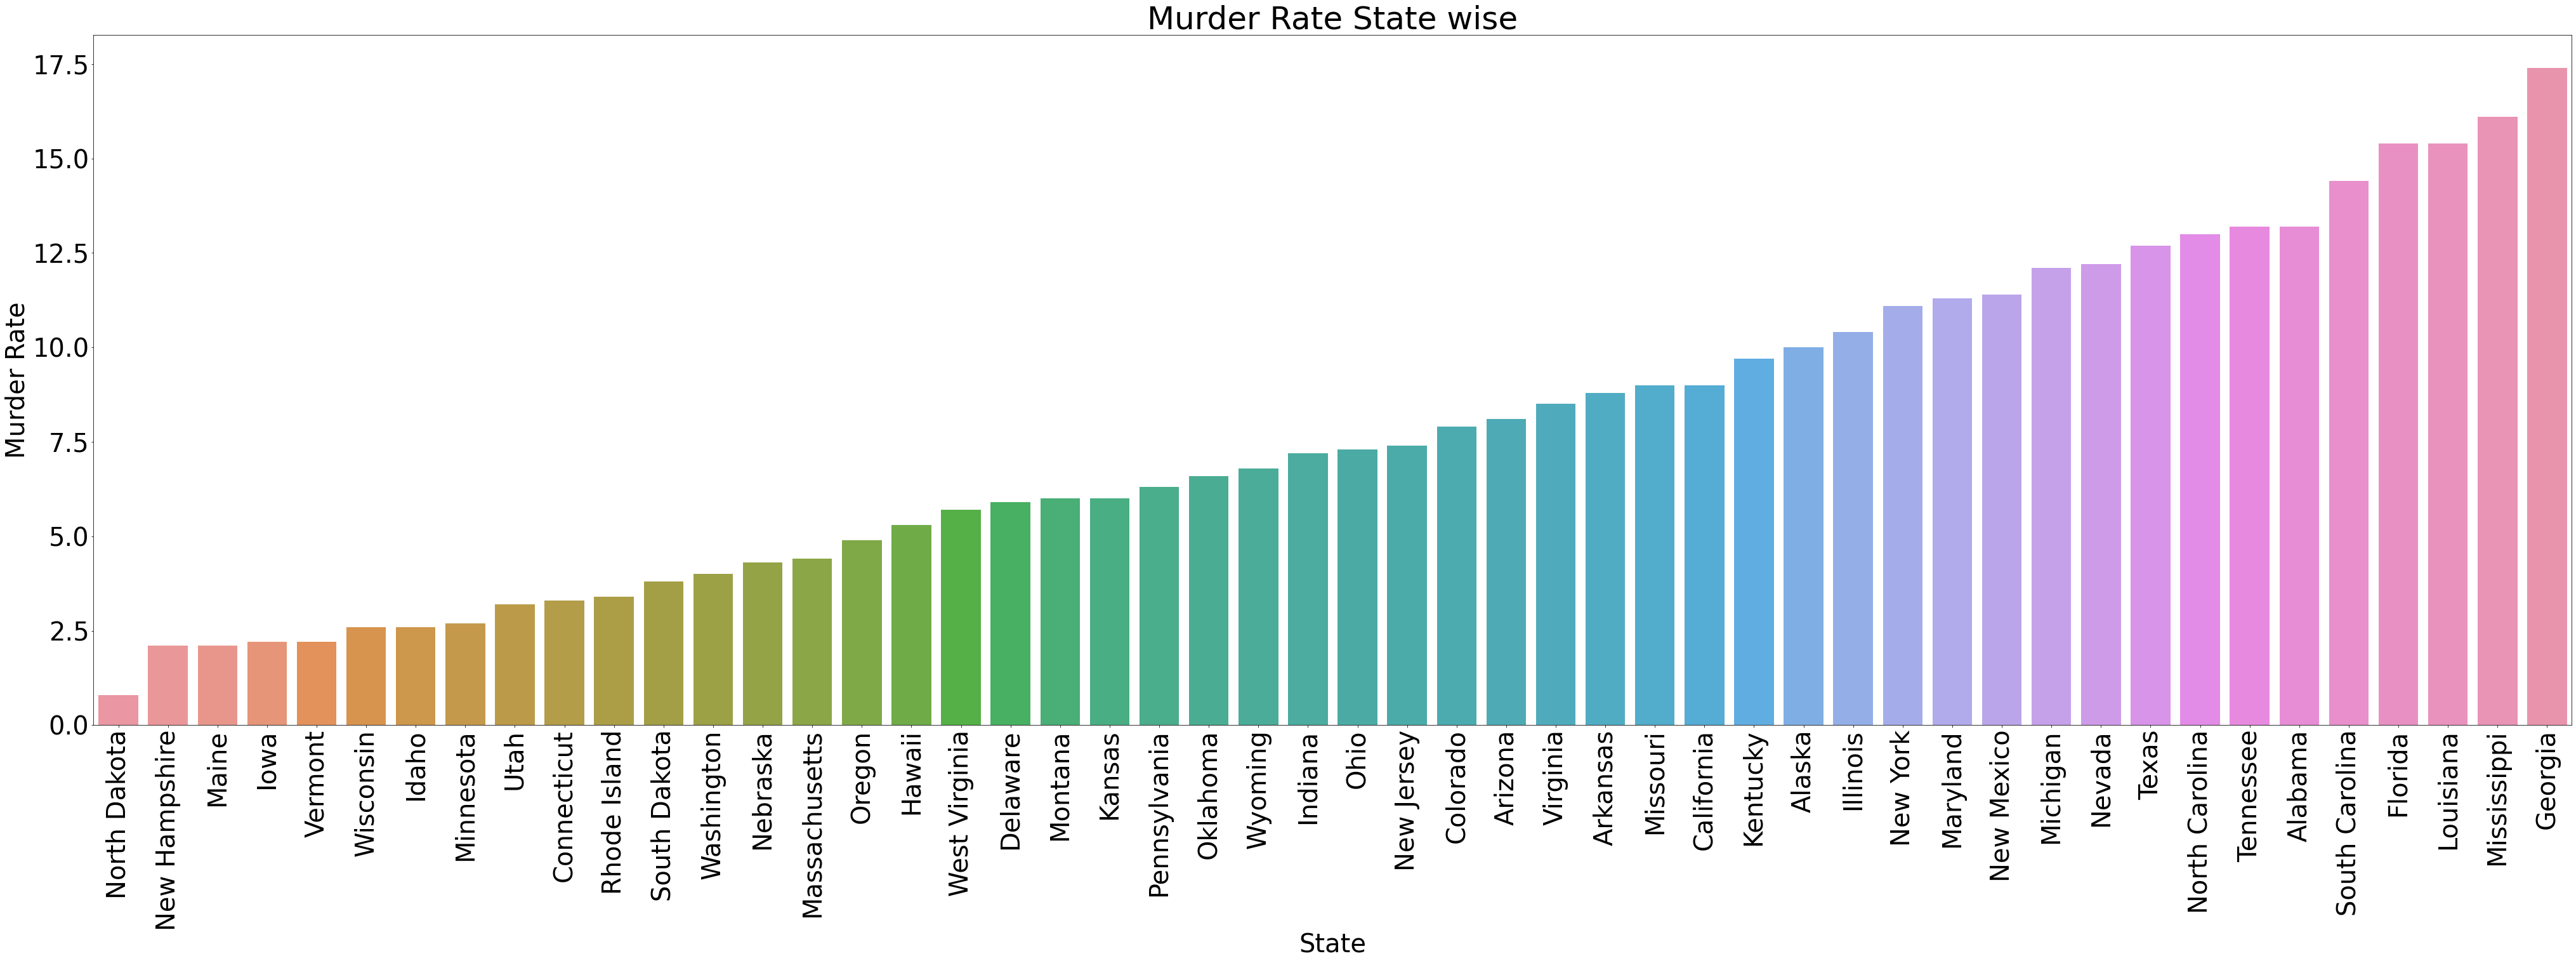

In [13]:
#Bivariate Analysis
#Crime Rate according to state
plt.figure(figsize=(70,20))
plt.yticks(rotation = 0, fontsize = 40)
plt.xticks(rotation = 90, fontsize = 40)
sns.barplot(x=crime_data.State, y = crime_data.Murder, order=crime_data.sort_values('Murder').State)
plt.xlabel('State', size=40)
plt.ylabel('Murder Rate', size=40)
plt.title('Murder Rate State wise', size=50)
plt.show()

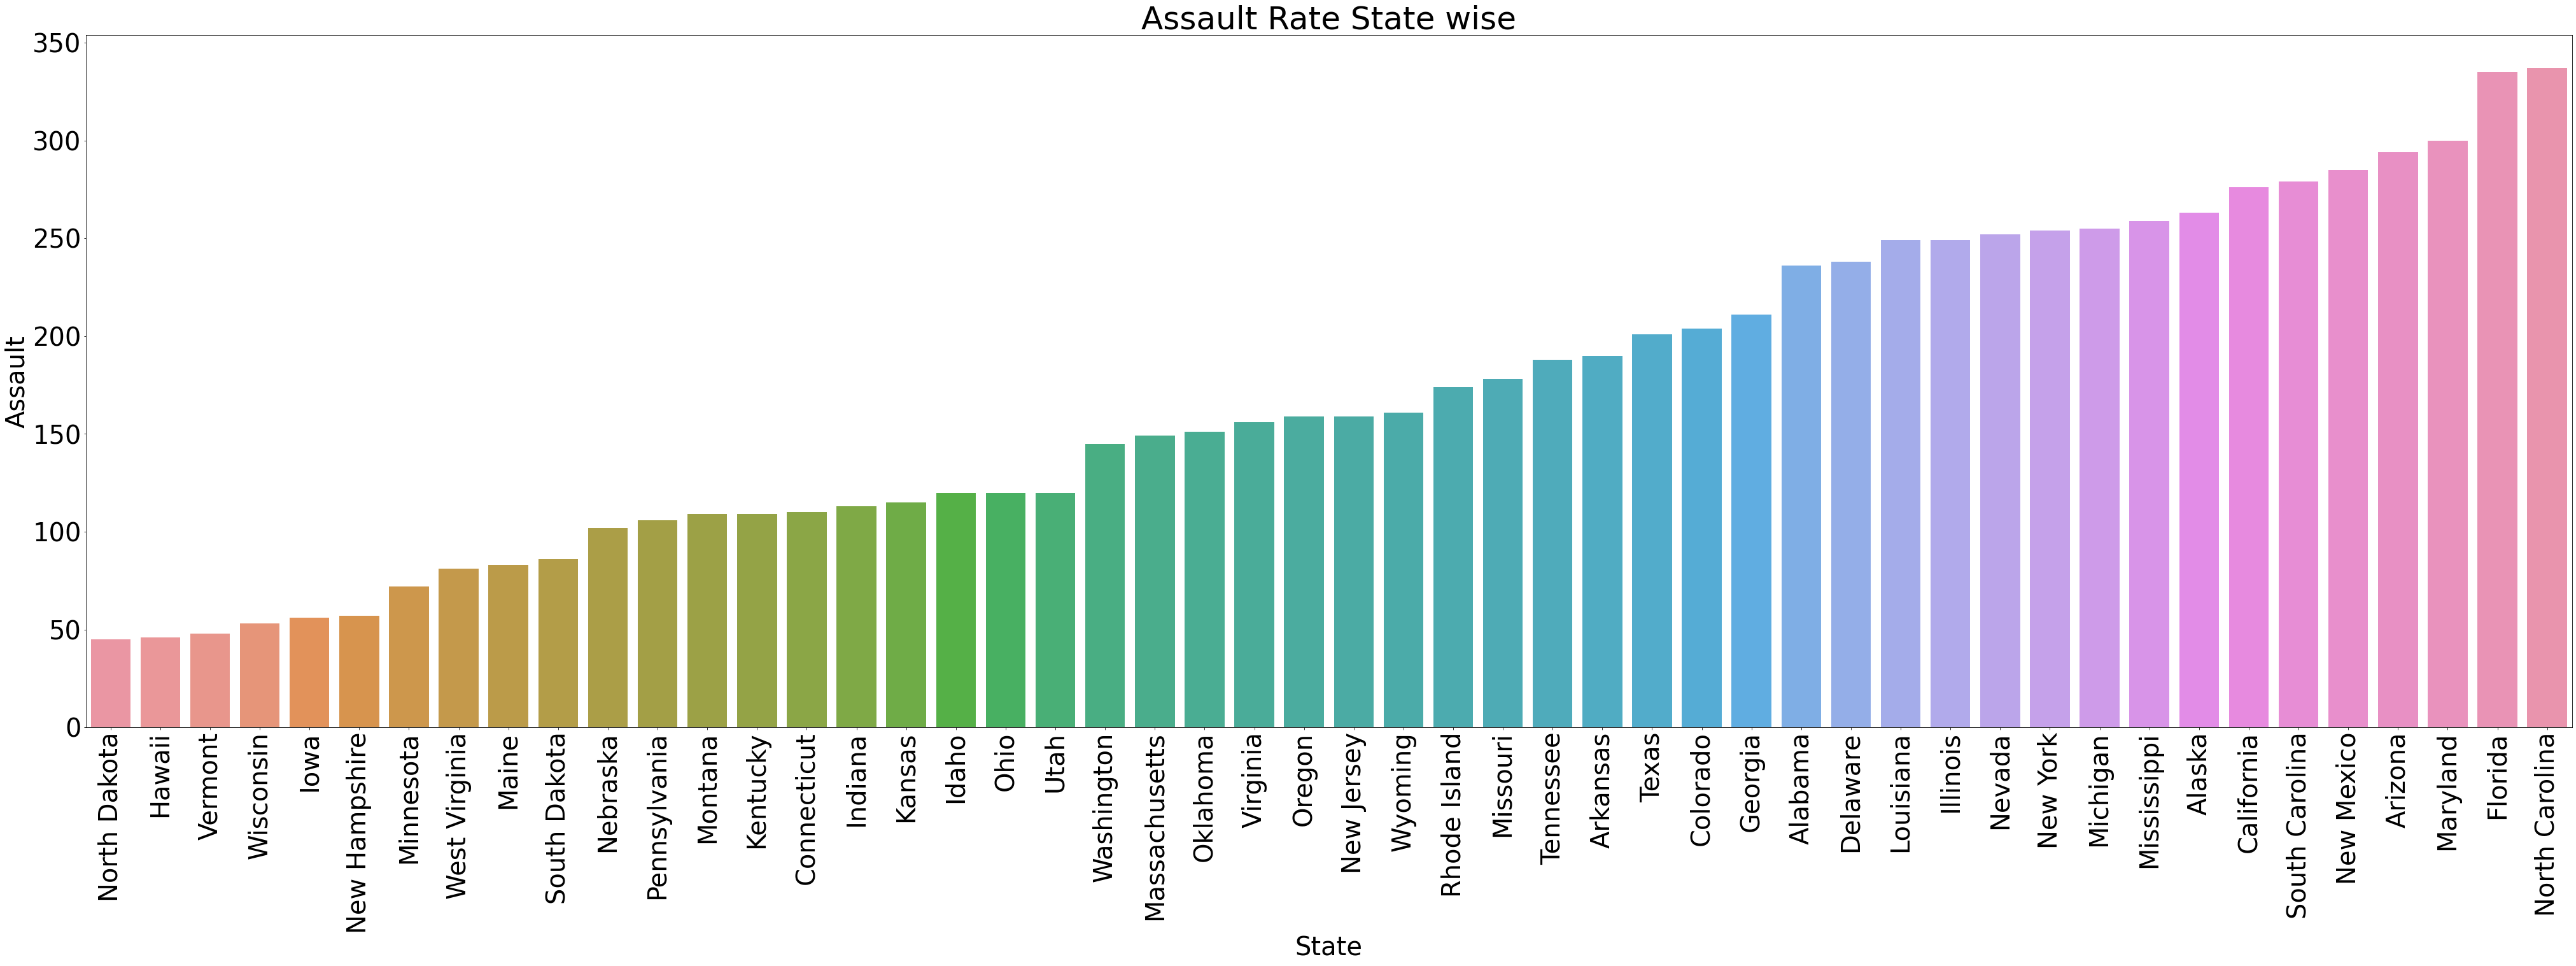

In [14]:
plt.figure(figsize=(70,20))
plt.yticks(rotation = 0, fontsize = 40)
plt.xticks(rotation = 90, fontsize = 40)
sns.barplot(x=crime_data.State, y = crime_data.Assault, order=crime_data.sort_values('Assault').State)
plt.xlabel('State', size=40)
plt.ylabel('Assault', size=40)
plt.title('Assault Rate State wise', size=50)
plt.show()


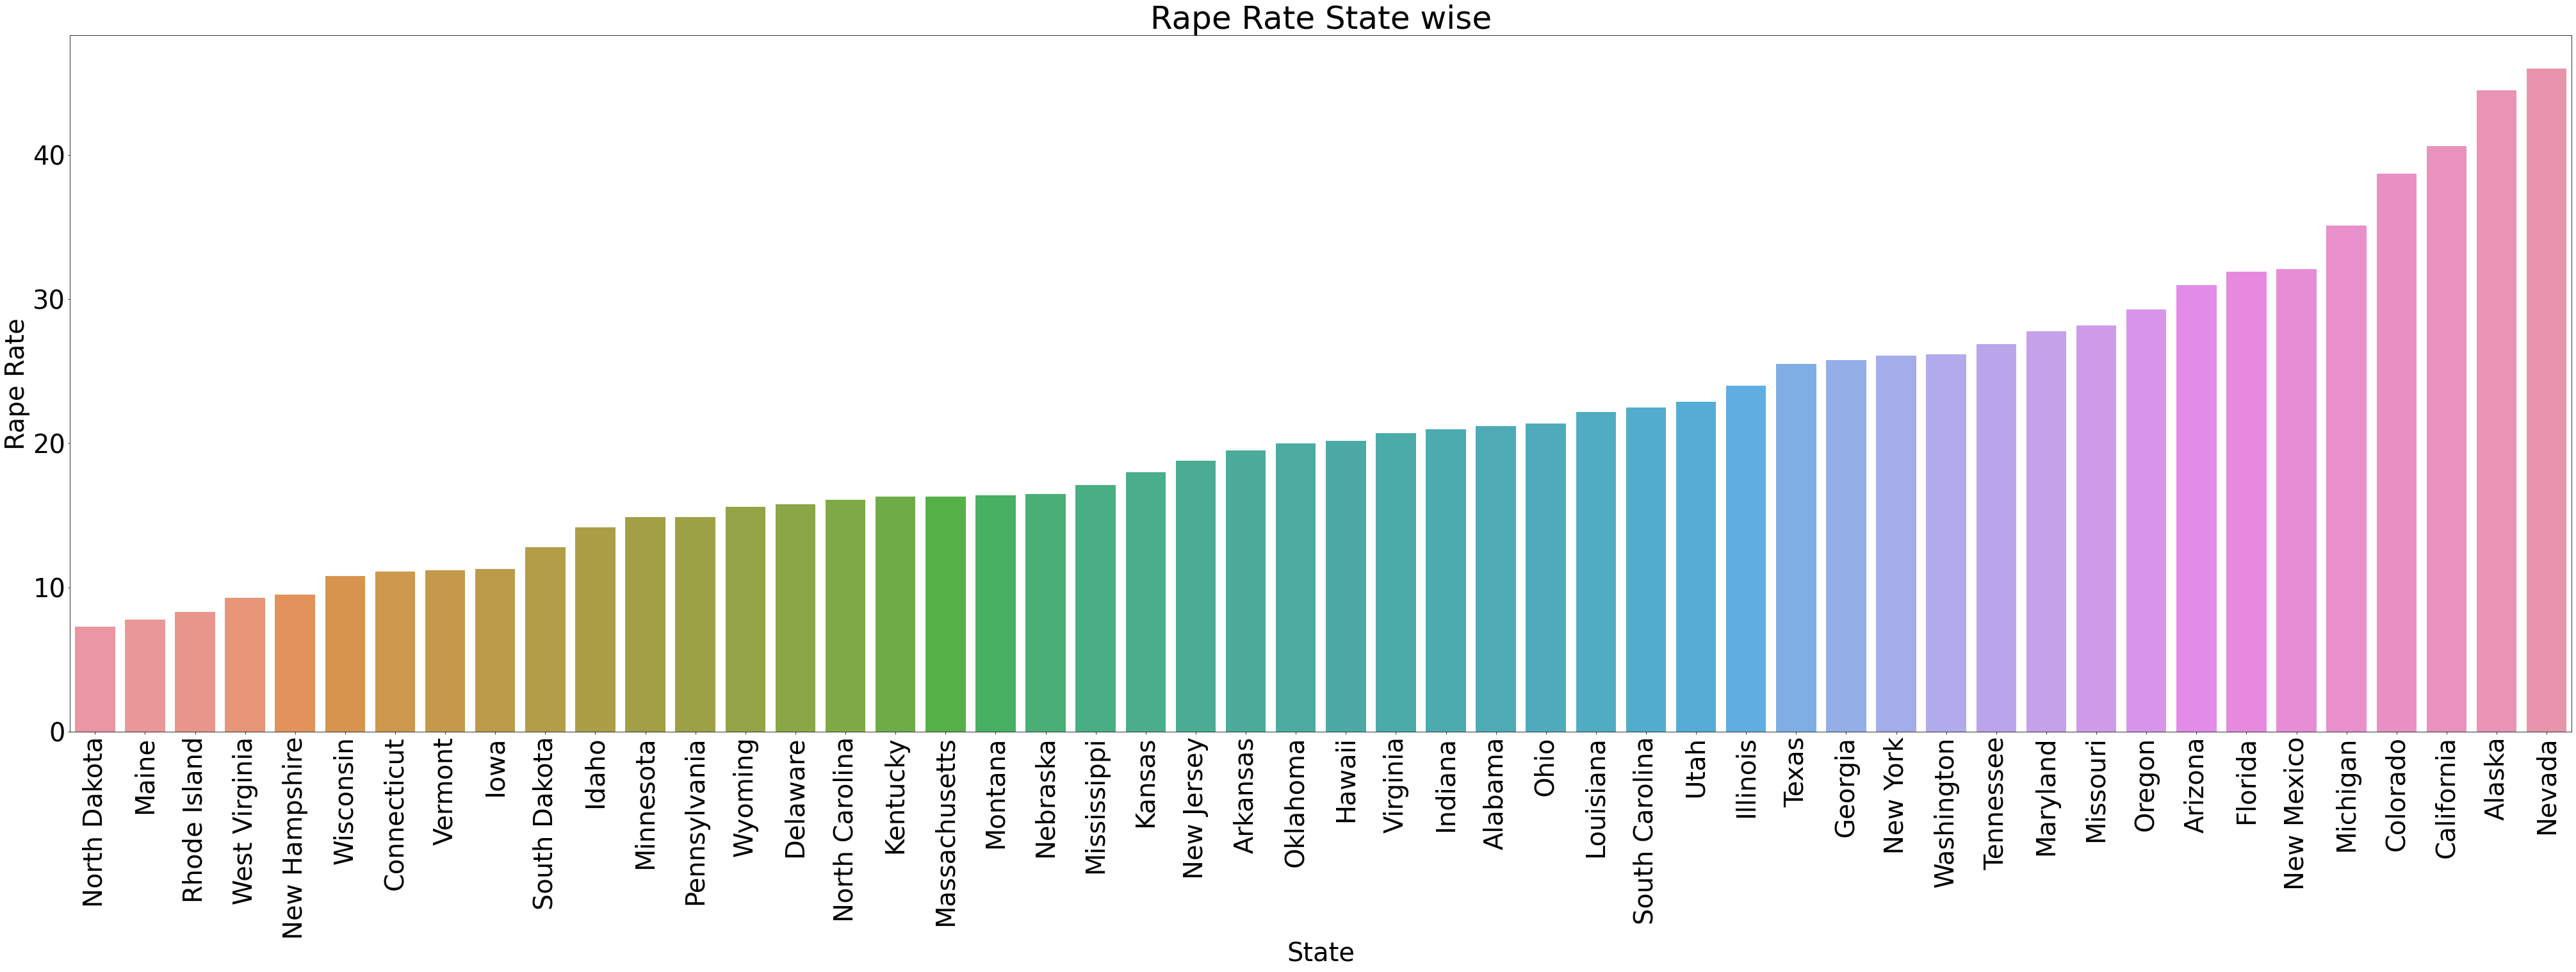

In [15]:
plt.figure(figsize=(70,20))
plt.yticks(rotation = 0, fontsize = 40)
plt.xticks(rotation = 90, fontsize = 40)
sns.barplot(x=crime_data.State, y = crime_data.Rape, order=crime_data.sort_values('Rape').State)
plt.xlabel('State', size=40)
plt.ylabel('Rape Rate', size=40)
plt.title('Rape Rate State wise', size=50)
plt.show()

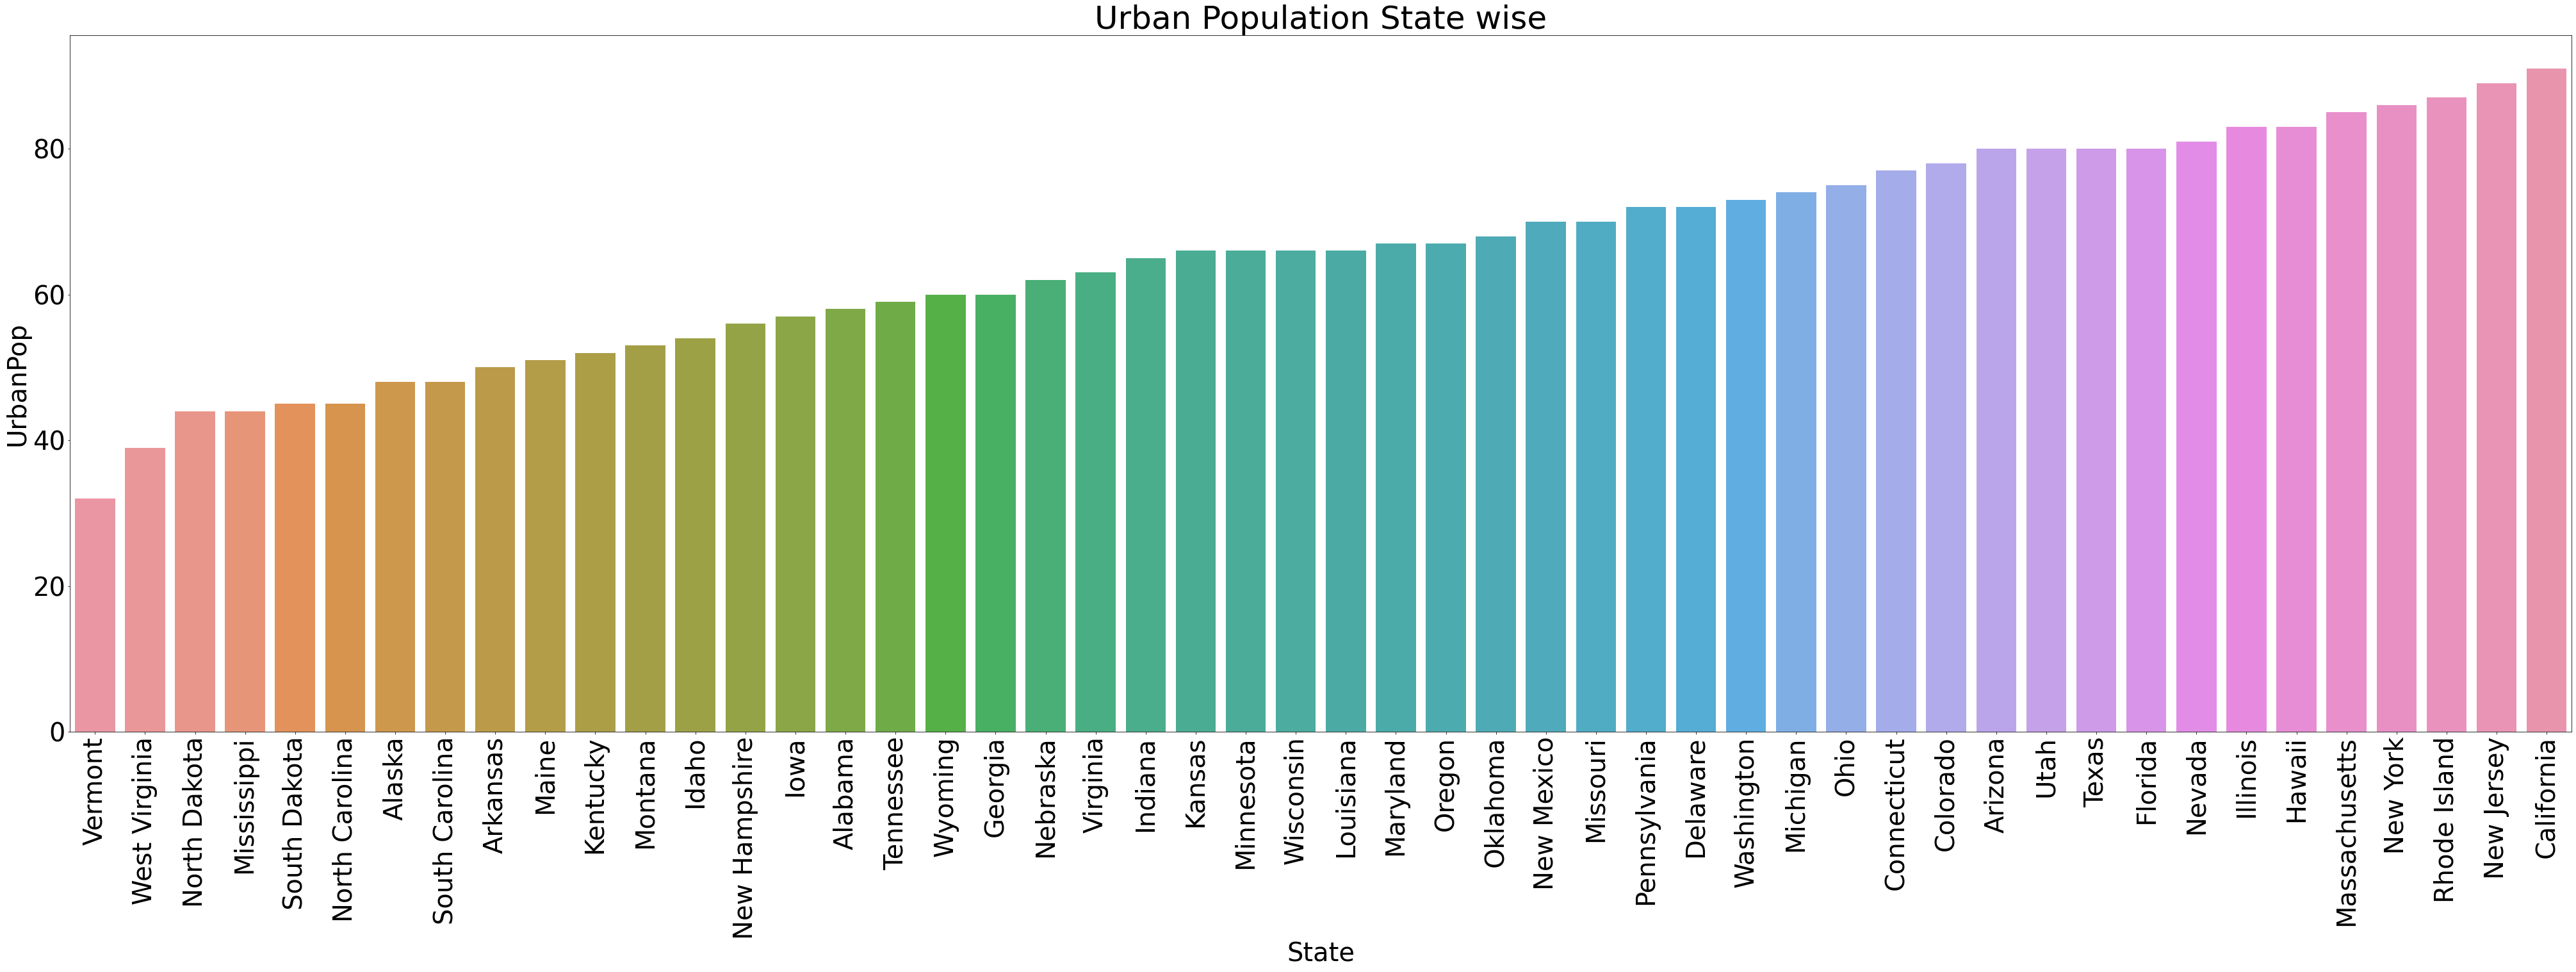

In [16]:
plt.figure(figsize=(70,20))
plt.yticks(rotation = 0, fontsize = 40)
plt.xticks(rotation = 90, fontsize = 40)
sns.barplot(x=crime_data.State, y = crime_data.UrbanPop, order=crime_data.sort_values('UrbanPop').State)
plt.xlabel('State', size=40)
plt.ylabel('UrbanPop', size=40)
plt.title('Urban Population State wise', size=50)
plt.show()

From the plots we can imply that in North Dakota the urbna population is less, and all the murder rate, assault rate and rape rate is the lowest.

Whereas in California and Florida, the urban population is on higher side and the murder, assault and rape rate all are high. 

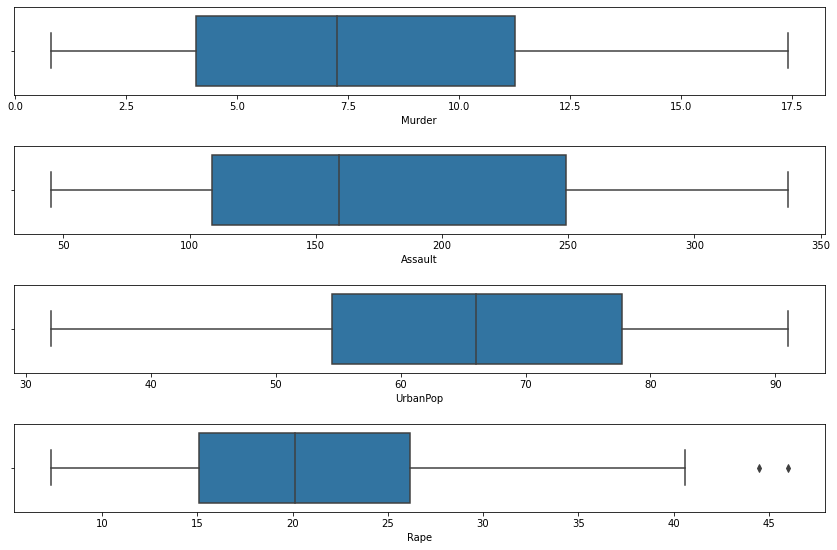

In [17]:
#Outlier Detection
fig, axes=plt.subplots(4,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Murder',data=crime_data,ax=axes[0])
sns.boxplot(x='Assault',data=crime_data,ax=axes[1])
sns.boxplot(x='UrbanPop',data=crime_data,ax=axes[2])
sns.boxplot(x='Rape',data=crime_data,ax=axes[3])
plt.tight_layout(pad=2.0)

There are few outliers in Rape rate but we cannot remove them as they are a legitimate data in few states. 

<AxesSubplot:xlabel='Rape'>

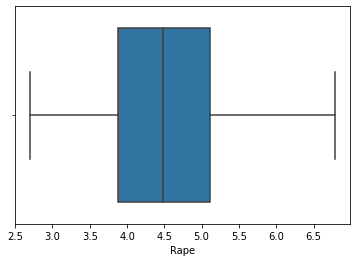

In [18]:
#use log transformation to check
import numpy as np
sns.boxplot(np.sqrt(crime_data.Rape))

In [19]:
#Correaltion Matrix
crime_data.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


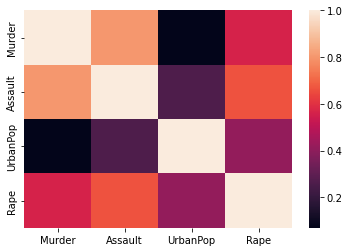

In [20]:
sns.heatmap(crime_data.corr())
plt.show()

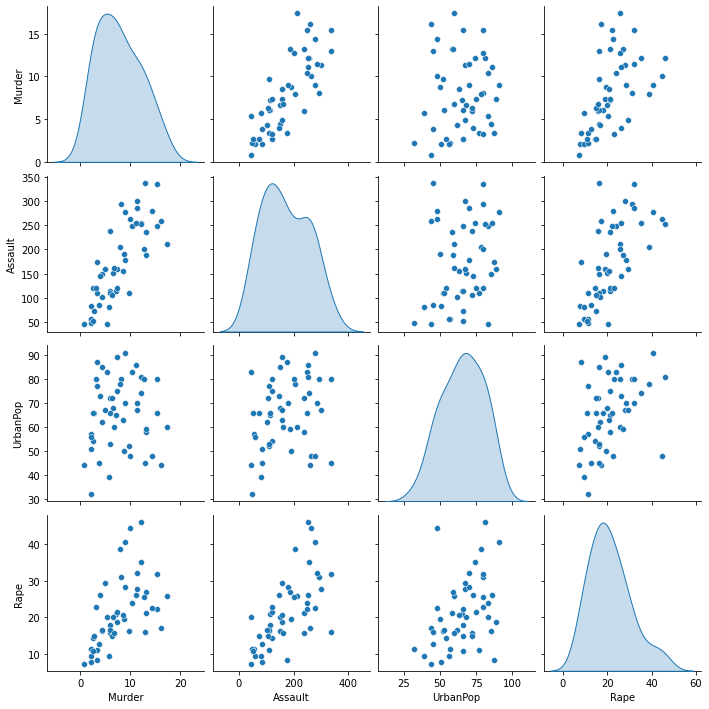

In [21]:
sns.pairplot(crime_data,diag_kind="kde")

# 7. Data Preparation -  

## Standardise the data 

In [23]:
crime_data.drop('State',axis=1,inplace=True)

In [25]:
crime_data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [28]:
scalar_data = MinMaxScaler()
scalar_data=scalar_data.fit_transform(crime_data)

In [30]:
scalar_data = pd.DataFrame(scalar_data,columns=['Murder','Assault','UrbanPop','Rape'])
scalar_data.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


# 8. CLUSTERING -  

# Hierarchical Clustering 

### Method : Single 

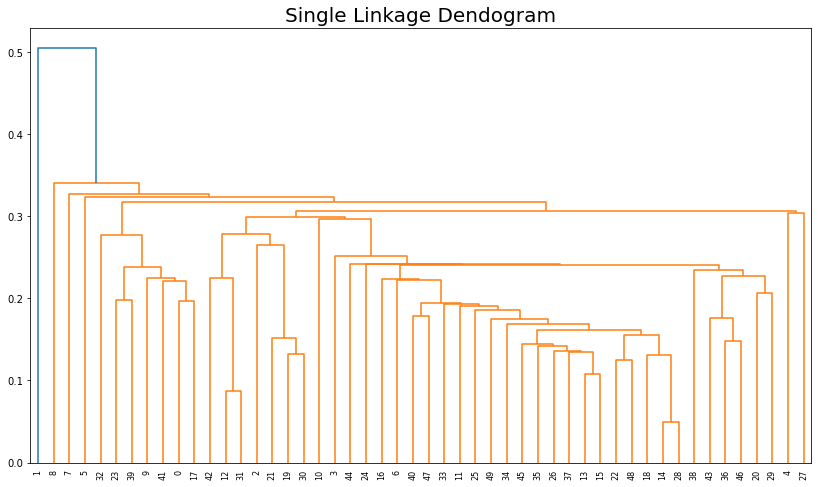

In [31]:
fig = plt.figure(figsize = (14,8))
dendogram = sch.dendrogram(sch.linkage(scalar_data, method = 'single'))
plt.title('Single Linkage Dendogram', size = 20)
plt.show()

In [32]:
hc_single = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')
hc_single

AgglomerativeClustering(linkage='single', n_clusters=3)

In [33]:
pred_y_single = hc_single.fit_predict(scalar_data)

In [34]:
crime_data['Cluster'] = pred_y_single
crime_data.head()

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0


In [35]:
crime_data['Cluster'].value_counts()

0    48
1     1
2     1
Name: Cluster, dtype: int64

### Method : Complete  

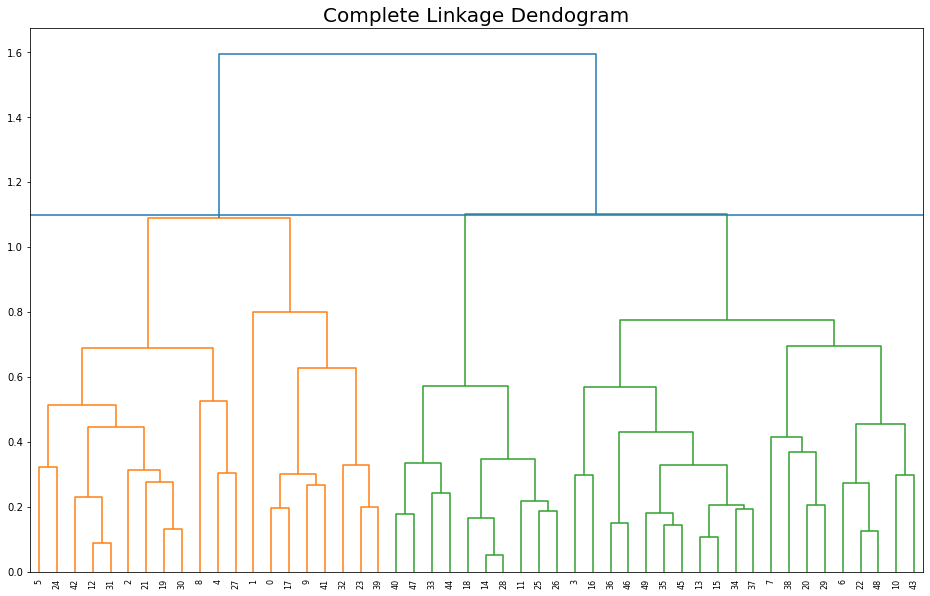

In [36]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(scalar_data, method = 'complete'))
plt.title('Complete Linkage Dendogram', size = 20)
plt.axhline(y=1.1)
plt.show()

In [37]:
hc_complete= AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
hc_complete

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [38]:
pred_y_complete = hc_complete.fit_predict(scalar_data)

In [39]:
crime_data['Cluster'] = pred_y_complete
crime_data.head()

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,3


In [40]:
crime_data['Cluster'].value_counts()

1    20
3    12
2    10
0     8
Name: Cluster, dtype: int64

### Method : Average 

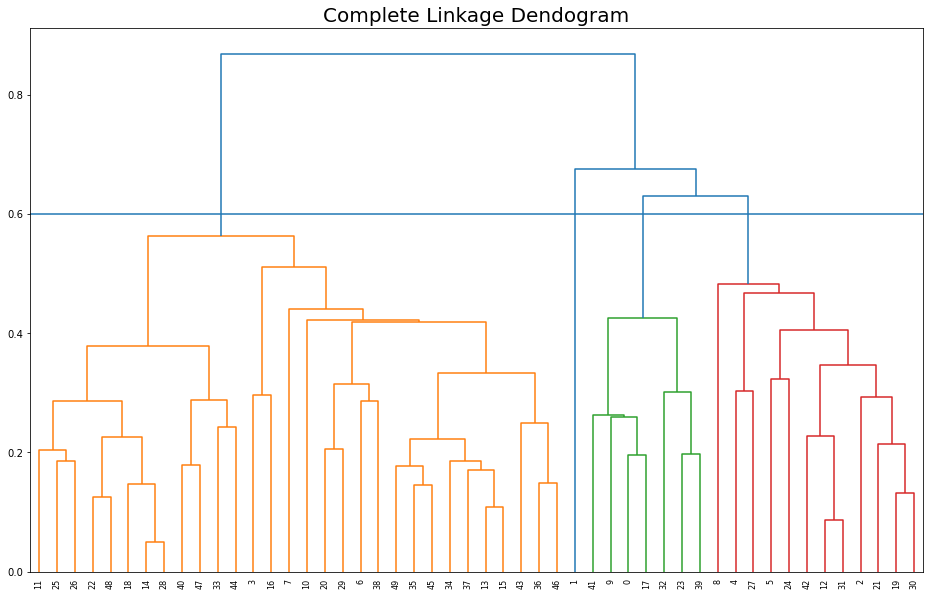

In [41]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(scalar_data, method = 'average'))
plt.title('Complete Linkage Dendogram', size = 20)
plt.axhline(y=0.6)
plt.show()

In [42]:
hc_avarage= AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')
hc_avarage

AgglomerativeClustering(linkage='average', n_clusters=4)

In [43]:
pred_y_avarage = hc_avarage.fit_predict(scalar_data)

In [44]:
crime_data['Cluster'] = pred_y_avarage
crime_data.head()

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1


In [45]:
crime_data['Cluster'].value_counts()

0    30
1    12
3     7
2     1
Name: Cluster, dtype: int64

### Method : Ward 

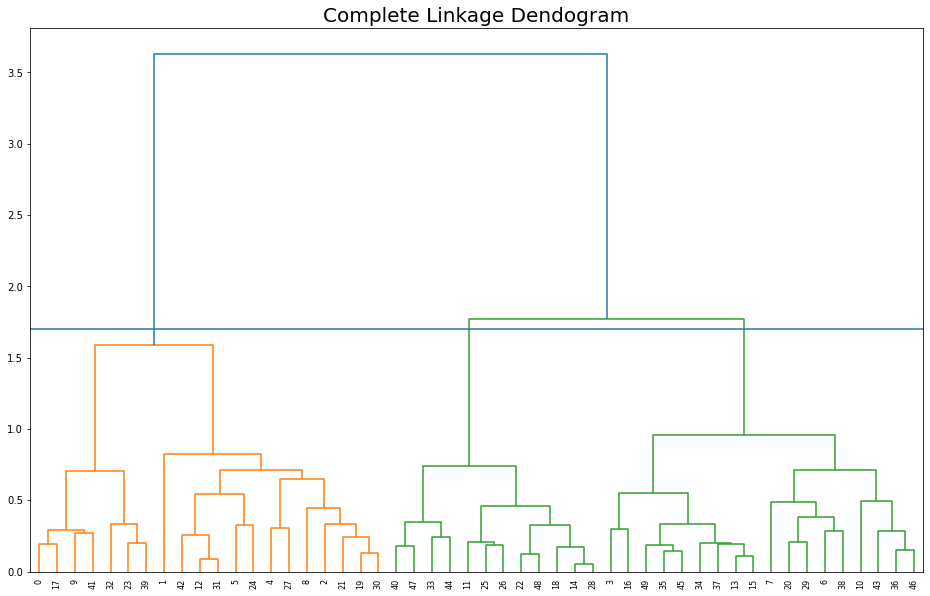

In [46]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(scalar_data, method = 'ward'))
plt.title('Complete Linkage Dendogram', size = 20)
plt.axhline(y=1.7)
plt.show()

In [47]:
hc_ward= AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
hc_ward

AgglomerativeClustering(n_clusters=3)

In [48]:
pred_y_ward = hc_ward.fit_predict(scalar_data)

In [49]:
crime_data['Cluster'] = pred_y_ward
crime_data.head()

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0


In [50]:
crime_data['Cluster'].value_counts()

0    20
1    18
2    12
Name: Cluster, dtype: int64

# K-Means Clustering 

In [52]:
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 12)
    kmeans.fit(scalar_data)
    sse.append(kmeans.inertia_)

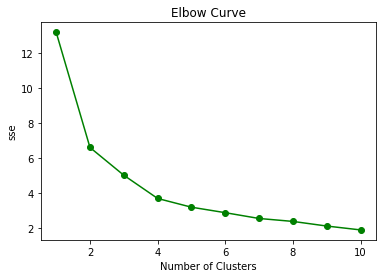

In [53]:
plt.plot(range(1,11), sse, 'bo-', color = 'g')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('sse')
plt.show()

From the above Elbow curve we can say that 4 clusters can be formed,because exact position of Elbow
is at 4. 

In [54]:
kmeans_cluster = KMeans(4, random_state = 42)
kmeans_cluster.fit(scalar_data)

KMeans(n_clusters=4, random_state=42)

In [55]:
y_pred_k = kmeans_cluster.fit_predict(scalar_data)

In [56]:
crime_data['Cluster'] = y_pred_k
crime_data.head()

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,1


In [57]:
crime_data['Cluster'].value_counts()

3    17
0    13
1    12
2     8
Name: Cluster, dtype: int64

# DBSCAN Clustering 

In [58]:
dbscan = DBSCAN(eps = 0.3, min_samples = 3)
dbscan.fit(scalar_data)

DBSCAN(eps=0.3, min_samples=3)

In [60]:
pred_db=dbscan.fit_predict(scalar_data)

In [61]:
crime_data['Cluster_DBSCAN'] = pred_db
crime_data.head()

,Murder,Assault,UrbanPop,Rape,Cluster,Cluster_DBSCAN
0,13.2,236,58,21.2,2,0
1,10.0,263,48,44.5,1,-1
2,8.1,294,80,31.0,1,1
3,8.8,190,50,19.5,2,1
4,9.0,276,91,40.6,1,-1


## Evaluating Clustering methods with the help of Silhouette Score

* **The Silhouette Score metric calculates the goodness of the clustering techniques and it ranges from -1 to 1.**

* **1: Means clusters are well apart from each other and clearly distinguished.**

* **0: Means the distance between clusters is not significant.**

* **-1: Means clusters are assigned in the wrong way.** 

In [65]:
silhouette_SLM = (metrics.silhouette_score(scalar_data,pred_y_single))
silhouette_SLM

0.14223288708185444

In [66]:
silhouette_CLM = (metrics.silhouette_score(scalar_data,pred_y_complete))
silhouette_CLM

0.30607294424263076

In [67]:
silhouette_ALM = (metrics.silhouette_score(scalar_data,pred_y_avarage))
silhouette_ALM

0.36992391140277175

In [69]:
silhouette_CenLM = (metrics.silhouette_score(scalar_data,pred_y_ward))
silhouette_CenLM

0.31916915428121284

In [70]:
silhouette_KMeans = (metrics.silhouette_score(scalar_data,y_pred_k))
silhouette_KMeans

0.3408903560074363

In [71]:
silhouette_DBSCAN = (metrics.silhouette_score(scalar_data,pred_db))
silhouette_DBSCAN

0.24738588099272626

In [72]:
table = {'Clustering Models' : ['HC Single Linkage', 'HC Complete Linkage', 'HC Average Linkage',
                                'HC Centroid Linkage', 'KMeans', 'DBSCAN'], 
          'Silhouette Score' : [silhouette_SLM, silhouette_CLM, silhouette_ALM, silhouette_CenLM,
                                silhouette_KMeans, silhouette_DBSCAN]
        }
table = pd.DataFrame(table)
table

,Clustering Models,Silhouette Score
0,HC Single Linkage,0.142233
1,HC Complete Linkage,0.306073
2,HC Average Linkage,0.369924
3,HC Centroid Linkage,0.319169
4,KMeans,0.340890
5,DBSCAN,0.247386


# CONCLUSION

### From the above table, it is evident that different types of hierarchical clustering is way more complex to understand and Average Linkage is giving better result compared to other hierarchical clustering.From all the clustering methods KMeans Clustering also provides the better result with 4 clusters.